In [1]:
root_path = "/Users/devasenan/Documents/conser-vision/data/"
# root_path = "C:/Users/devas/Documents/projects/conser-vision/data/"

In [2]:
import pickle

with open(root_path+'pickles/train_images.pickle', 'rb') as train_imgs:
    train_images = pickle.load(train_imgs)
    train_imgs.close()

with open(root_path+'pickles/train_sites.pickle', 'rb') as train_st:
    train_sites = pickle.load(train_st)
    train_st.close()

with open(root_path+'pickles/train_labels.pickle', 'rb') as train_lbls:
    train_y = pickle.load(train_lbls)
    train_lbls.close()

with open(root_path+'pickles/test_images.pickle', 'rb') as train_imgs:
    test_images = pickle.load(train_imgs)
    train_imgs.close()

with open(root_path+'pickles/test_sites.pickle', 'rb') as test_st:
    test_sites = pickle.load(test_st)
    test_st.close()

with open(root_path+'pickles/test_labels.pickle', 'rb') as test_lbls:
    test_y = pickle.load(test_lbls)
    test_lbls.close()

Going through the data we have

In [21]:
import matplotlib.pyplot as plt

In [28]:
classes = ['antelope_duiker','bird','blank','civet_genet','hog','leopard','monkey_prosimian','rodent']

In [3]:
train_images.shape

(16488, 128, 128, 3)

In [30]:
test_y.shape

(4464,)

In [29]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 7))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])  

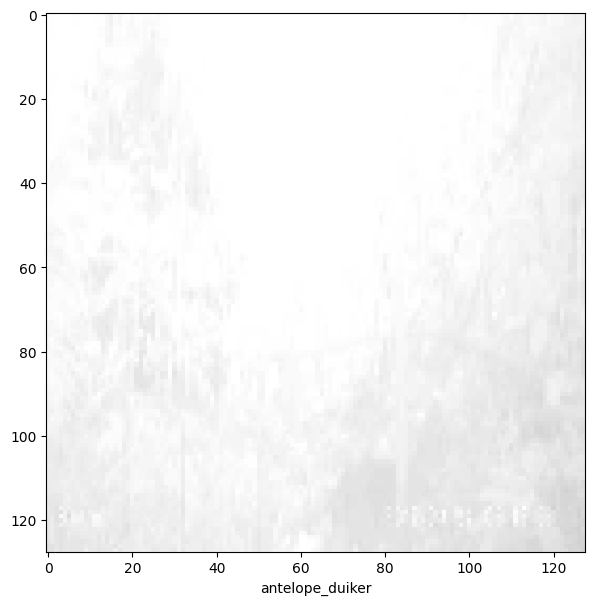

In [35]:
plot_sample(train_images, train_y, 7)

In [37]:
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np

Model 0

In [41]:
ann = models.Sequential([
    layers.Flatten(input_shape=(128, 128, 3)),
    layers.Dense(5000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ann.fit(train_images, train_y, epochs=5)

Epoch 1/5
516/516 [==============================] - 2988s 6s/step - loss: 1.7676 - accuracy: 0.3371
Epoch 2/5
516/516 [==============================] - 1932s 4s/step - loss: 1.5072 - accuracy: 0.4252
Epoch 3/5
516/516 [==============================] - 1884s 4s/step - loss: 1.3744 - accuracy: 0.4830
Epoch 4/5
516/516 [==============================] - 1847s 4s/step - loss: 1.2974 - accuracy: 0.5164
Epoch 5/5
516/516 [==============================] - 1787s 3s/step - loss: 1.2122 - accuracy: 0.5529


In [42]:
ann.evaluate(test_images, test_y)

140/140 [==============================] - 364s 3s/step - loss: 3.2279 - accuracy: 0.1243


[3.2279434204101562, 0.12432795763015747]

In [ ]:
y_pred = ann.predict(test_images)

Model 0.1

In [43]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(train_images, train_y, epochs=10)

Epoch 1/10


ValueError: in user code:

    File "/Users/devasenan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Users/devasenan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/devasenan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Users/devasenan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/devasenan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "/Users/devasenan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 184, in __call__
        self.build(y_pred)
    File "/Users/devasenan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 133, in build
        self._losses = tf.nest.map_structure(self._get_loss_object, self._losses)
    File "/Users/devasenan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 272, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/Users/devasenan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/losses.py", line 2367, in get
        return deserialize(identifier)
    File "/Users/devasenan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/losses.py", line 2322, in deserialize
        return deserialize_keras_object(
    File "/Users/devasenan/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/utils/generic_utils.py", line 709, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: sparse_catogorical_crossentropy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


Model 1

In [22]:
model1 = Sequential()

model1.add(Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(32, (3,3), activation='relu'))
model1.add(MaxPooling2D((2,2)))

model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [23]:
opt1 = keras.optimizers.SGD(learning_rate=0.001)
model1.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [15]:
model1.fit(train_images, train_y, epochs=5, batch_size=64)

Epoch 1/5
258/258 [==============================] - 73s 273ms/step - loss: nan - accuracy: 0.1474
Epoch 2/5
258/258 [==============================] - 68s 263ms/step - loss: nan - accuracy: 0.1500
Epoch 3/5
258/258 [==============================] - 64s 247ms/step - loss: nan - accuracy: 0.1500
Epoch 4/5
258/258 [==============================] - 68s 262ms/step - loss: nan - accuracy: 0.1500
Epoch 5/5
258/258 [==============================] - 63s 245ms/step - loss: nan - accuracy: 0.1500


In [17]:
model1.evaluate(test_images, test_y)

140/140 [==============================] - 6s 38ms/step - loss: nan - accuracy: 0.1147


[nan, 0.11469534039497375]

Model 2

In [29]:
model2 = Sequential()

model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(128, 128, 3)))
model2.add(MaxPooling2D())

model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Conv2D(16, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))


In [30]:
opt2 = keras.optimizers.Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=opt2, metrics=['accuracy'])

In [31]:
model2.fit(train_images, train_y, epochs=5, batch_size=64)

Epoch 1/5
258/258 [==============================] - 77s 285ms/step - loss: -99740482011136.0000 - accuracy: 0.0996
Epoch 2/5
258/258 [==============================] - 79s 306ms/step - loss: -13150134372139008.0000 - accuracy: 0.0995
Epoch 3/5
258/258 [==============================] - 62s 240ms/step - loss: -167500666527285248.0000 - accuracy: 0.0995
Epoch 4/5
258/258 [==============================] - 79s 305ms/step - loss: -871972163173744640.0000 - accuracy: 0.0995
Epoch 5/5
258/258 [==============================] - 72s 278ms/step - loss: -2883836205848330240.0000 - accuracy: 0.0995
